In [10]:
import sys
import os

# 1. 自动定位项目根目录 (TinyML_Gas_Drift)
# 假设 Notebook 在 notebooks/ 文件夹下，'..' 就是根目录
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 2. 强制定位你的 conda 环境 site-packages (解决 DLL 报错)
# 请确保这个路径指向你安装了 CPU 版 torch 的环境
conda_env_path = r'C:\Users\yzhou\AppData\Local\anaconda3\envs\tinyml_drift\Lib\site-packages'
if conda_env_path not in sys.path:
    sys.path.insert(0, conda_env_path)

# 3. 解决 Windows 下的 DLL 冲突 (针对 WinError 1114)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
env_dll_path = r'C:\Users\yzhou\AppData\Local\anaconda3\envs\tinyml_drift\Library\bin'
if os.path.exists(env_dll_path):
    os.add_dll_directory(env_dll_path)

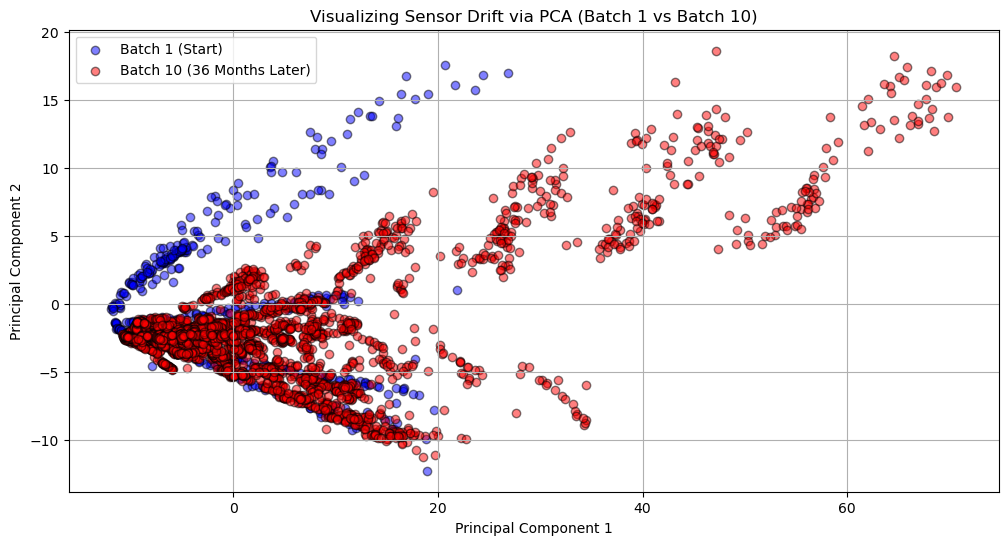

前两个主成分解释了 81.50% 的方差


In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from src.data_loader import GasSensorLoader
import numpy as np

# 1. 加载数据
loader = GasSensorLoader(data_dir='../Dataset')
X1, y1 = loader.load_batch(1)
X10, y10 = loader.load_batch(10)

# 2. 数据标准化 (注意：学术严谨性要求仅使用 Batch 1 的参数来缩放)
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
X10_scaled = scaler.transform(X10)

# 3. 运行 PCA
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_scaled)
X10_pca = pca.transform(X10_scaled)

# 4. 可视化
plt.figure(figsize=(12, 6))

# 绘制 Batch 1 (早期)
plt.scatter(X1_pca[:, 0], X1_pca[:, 1], c='blue', label='Batch 1 (Start)', alpha=0.5, edgecolors='k')
# 绘制 Batch 10 (36个月后)
plt.scatter(X10_pca[:, 0], X10_pca[:, 1], c='red', label='Batch 10 (36 Months Later)', alpha=0.5, edgecolors='k')

plt.title("Visualizing Sensor Drift via PCA (Batch 1 vs Batch 10)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 5. 打印方差解释率
print(f"前两个主成分解释了 {np.sum(pca.explained_variance_ratio_)*100:.2f}% 的方差")

# 回到PCA以前

<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
<>:37: SyntaxWarning: invalid escape sequence '\D'
<>:40: SyntaxWarning: invalid escape sequence '\D'
<>:43: SyntaxWarning: invalid escape sequence '\D'
<>:46: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yzhou\AppData\Local\Temp\ipykernel_19472\1633350361.py:37: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_title(f'Top {top_k} Features with Largest $\Delta$Mean (Batch 1 to 10)')
C:\Users\yzhou\AppData\Local\Temp\ipykernel_19472\1633350361.py:40: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('$\Delta \mu$ (Offset Drift)')
C:\Users\yzhou\AppData\Local\Temp\ipykernel_19472\1633350361.py:43: SyntaxWarning: invalid escape sequence '\D'
  ax2.set_title(f'Top {top_k} Features with Largest $\Delta$Std (Batch 1 to 10)')
C:\Users\yzhou\AppData\Local\Temp\ipykernel

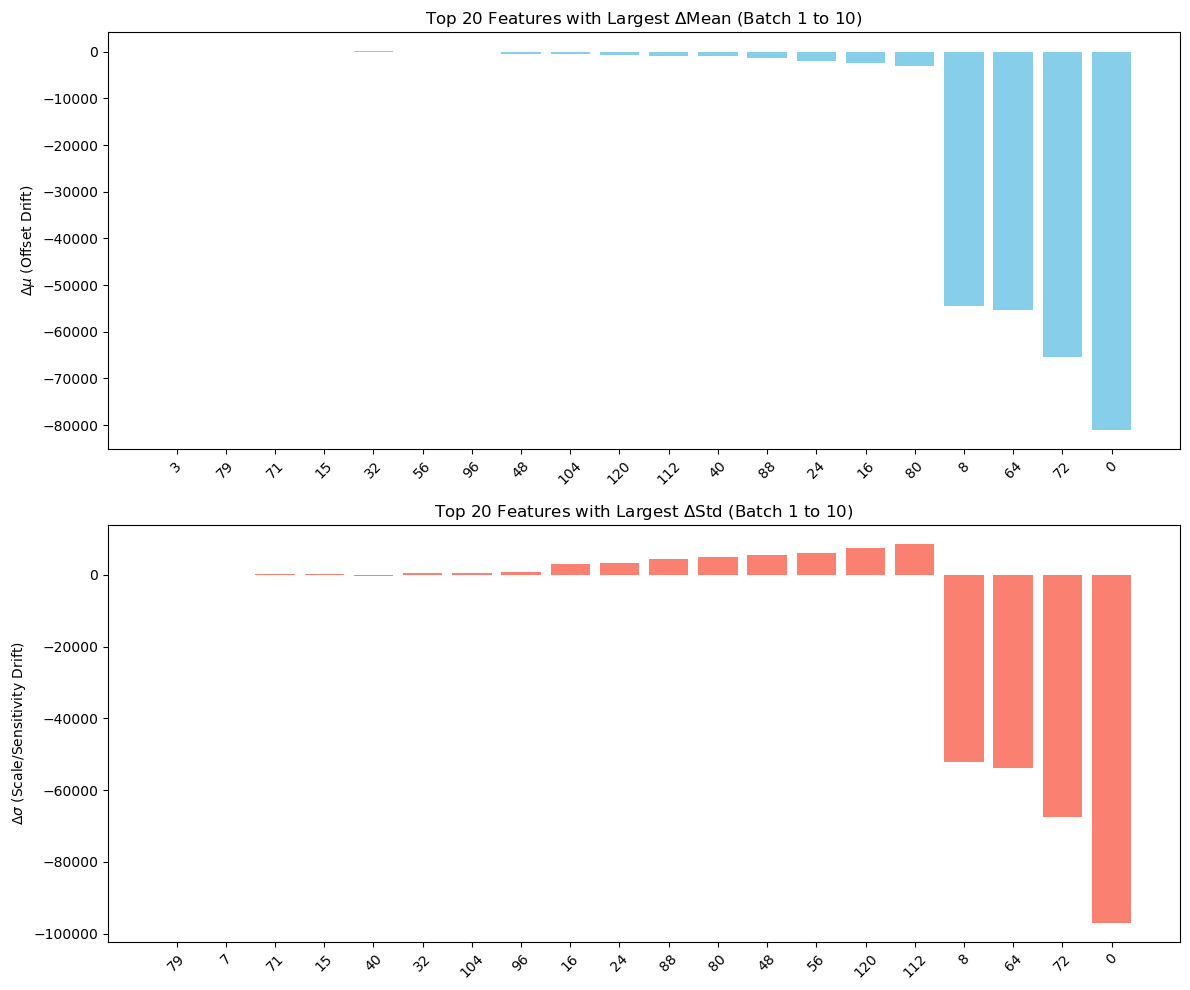

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from src.data_loader import GasSensorLoader
import numpy as np
import sys
import os

# 1. 自动定位项目根目录 (TinyML_Gas_Drift)
# 假设 Notebook 在 notebooks/ 文件夹下，'..' 就是根目录
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)
# 1. 加载数据
loader = GasSensorLoader(data_dir='../Dataset')
X1, y1 = loader.load_batch(1)
X10, y10 = loader.load_batch(10)
# 1. 计算统计量
mean1, std1 = X1.mean(axis=0), X1.std(axis=0)
mean10, std10 = X10.mean(axis=0), X10.std(axis=0)

# 2. 计算变化量 (Delta)
delta_mean = mean10 - mean1
delta_std = std10 - std1

# 3. 找出变化最大的 Top 20 个维度
top_k = 20
idx_mean = np.argsort(np.abs(delta_mean))[-top_k:]
idx_std = np.argsort(np.abs(delta_std))[-top_k:]

# 4. 绘图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

ax1.bar(range(top_k), delta_mean[idx_mean], color='skyblue')
ax1.set_title(f'Top {top_k} Features with Largest $\Delta$Mean (Batch 1 to 10)')
ax1.set_xticks(range(top_k))
ax1.set_xticklabels(idx_mean, rotation=45)
ax1.set_ylabel('$\Delta \mu$ (Offset Drift)')

ax2.bar(range(top_k), delta_std[idx_std], color='salmon')
ax2.set_title(f'Top {top_k} Features with Largest $\Delta$Std (Batch 1 to 10)')
ax2.set_xticks(range(top_k))
ax2.set_xticklabels(idx_std, rotation=45)
ax2.set_ylabel('$\Delta \sigma$ (Scale/Sensitivity Drift)')

plt.tight_layout()
plt.show()